In [2]:
!pip install yfinance

In [3]:
import yfinance as yf

In [4]:
df=yf.download('BTC-USD')

[*********************100%***********************]  1 of 1 completed


In [5]:
df.shape

(2731, 6)

In [6]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2022-03-05,39148.449219,39566.335938,38777.035156,39400.585938,39400.585938,16975917450
2022-03-06,39404.199219,39640.175781,38211.648438,38419.984375,38419.984375,19745229902
2022-03-07,38429.304688,39430.226562,37260.203125,38062.039062,38062.039062,28546143503


In [7]:
df.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2022-02-28', '2022-03-01', '2022-03-02', '2022-03-03',
               '2022-03-04', '2022-03-05', '2022-03-06', '2022-03-07',
               '2022-03-08', '2022-03-09'],
              dtype='datetime64[ns]', name='Date', length=2731, freq=None)

[]

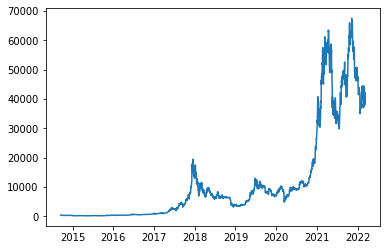

In [8]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Adj Close'])
plt.plot()

In [9]:
#Train Test split
to_row = int(len(df)*0.9)
training_data=list(df[:to_row]['Adj Close'])
training_data
testing_data=list(df[to_row:]['Adj Close'])

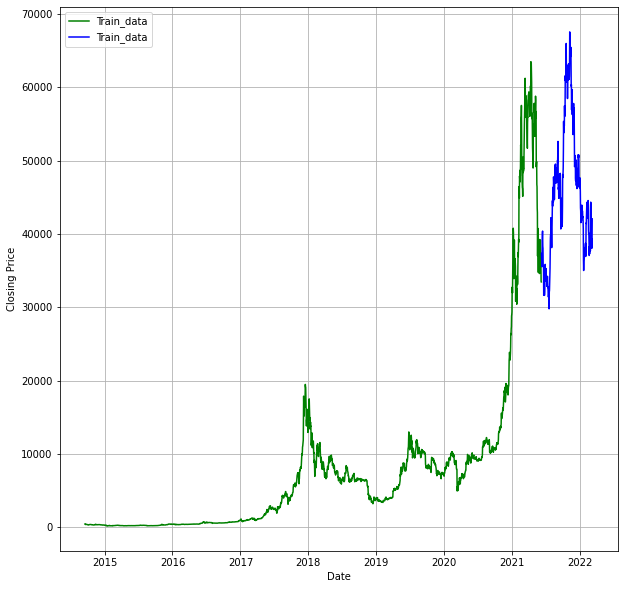

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.plot(df[:to_row]['Adj Close'],'green',label='Train_data')
plt.plot(df[to_row:]['Adj Close'],'blue',label='Train_data')
plt.legend()

In [31]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [24]:
model_prediction=[]
for i in range(len(testing_data)):
  model=ARIMA(training_data, order=(4,1,0))
  model_fit=model.fit()
  output= model_fit.forecast()
  yhat=output[0]
  model_prediction.append(yhat)
  actual_test_value=testing_data[i]
  #print(actual_test_value)
  training_data.append(actual_test_value)

In [25]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2730
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -22058.396
Date:                Wed, 09 Mar 2022   AIC                          44126.791
Time:                        15:06:27   BIC                          44156.350
Sample:                             0   HQIC                         44137.475
                               - 2730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0201      0.010     -2.087      0.037      -0.039      -0.001
ar.L2         -0.0043      0.009     -0.471      0.638      -0.022       0.013
ar.L3          0.0112      0.010      1.155      0.2

In [26]:
date_range=df[to_row:]
date_range.index

DatetimeIndex(['2021-06-09', '2021-06-10', '2021-06-11', '2021-06-12',
               '2021-06-13', '2021-06-14', '2021-06-15', '2021-06-16',
               '2021-06-17', '2021-06-18',
               ...
               '2022-02-28', '2022-03-01', '2022-03-02', '2022-03-03',
               '2022-03-04', '2022-03-05', '2022-03-06', '2022-03-07',
               '2022-03-08', '2022-03-09'],
              dtype='datetime64[ns]', name='Date', length=274, freq=None)

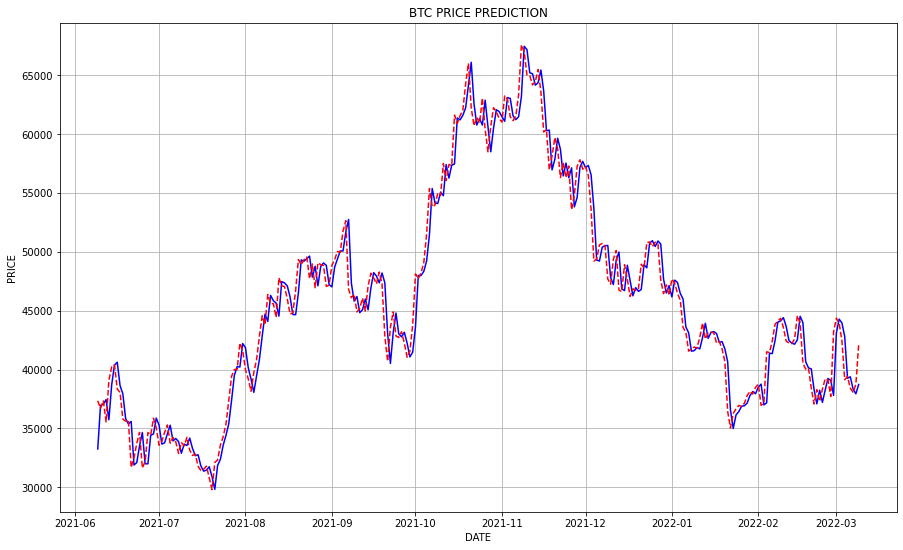

In [27]:
plt.figure(figsize=(15,9))
plt.grid(True)

date_range=df[to_row:].index

plt.plot(date_range, model_prediction[:], color='blue', linestyle='-', label="BTC PREDICTED PRICE")
plt.plot(date_range, testing_data, color='red', linestyle='dashed', label="BTC PREDICTED PRICE")

plt.title("BTC PRICE PREDICTION")
plt.xlabel("DATE")
plt.ylabel("PRICE")
plt.show()

In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(training_data, order=(0,1,1))
model_fit=model.fit()
output= model_fit.forecast()
print(int(output[0]))

42017


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3004
Model:               SARIMAX(0, 1, 1)   Log Likelihood              -24686.852
Date:                Wed, 09 Mar 2022   AIC                          49377.703
Time:                        15:10:55   BIC                          49389.718
Sample:                             0   HQIC                         49382.025
                               - 3004                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0056      0.010     -0.537      0.591      -0.026       0.015
sigma2      8.101e+05   7666.022    105.674      0.000    7.95e+05    8.25e+05
Ljung-Box (L1) (Q):                   0.00   Jarque-

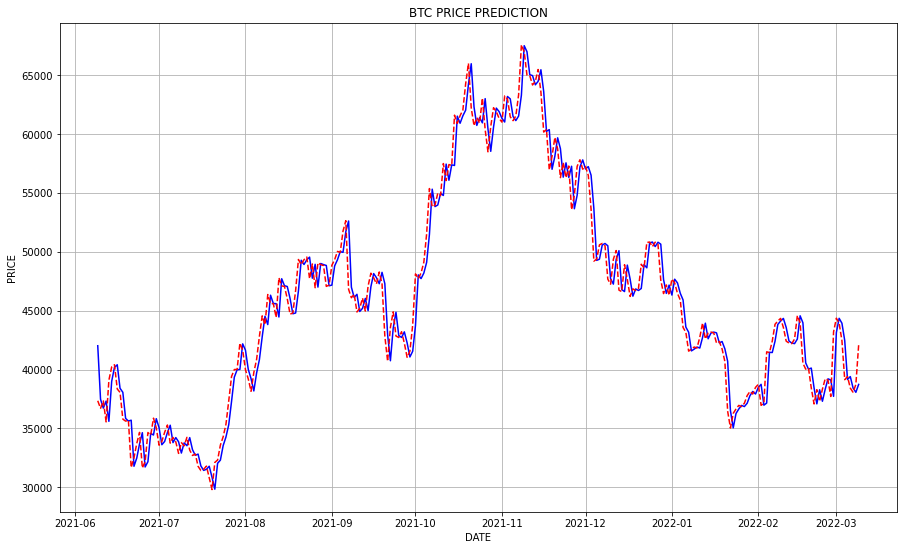

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_prediction=[]
for i in range(len(testing_data)):
  model=SARIMAX(training_data, order=(0,1,1))
  model_fit=model.fit()
  output= model_fit.forecast()
  yhat=((output[0]))
  model_prediction.append(yhat)
  actual_test_value=testing_data[i]
  #print(actual_test_value)
  training_data.append(actual_test_value)

print(model_fit.summary())

plt.figure(figsize=(15,9))
plt.grid(True)

date_range=df[to_row:].index

plt.plot(date_range, model_prediction[:], color='blue', linestyle='-', label="BTC PREDICTED PRICE")
plt.plot(date_range, testing_data, color='red', linestyle='dashed', label="BTC PREDICTED PRICE")

plt.title("BTC PRICE PREDICTION")
plt.xlabel("DATE")
plt.ylabel("PRICE")
plt.show()

In [34]:
!pip install pmdarima
from pmdarima.arima import auto_arima
step_wise=auto_arima(
    training_data,
    start_p=1,
    start_q=1,
    max_p=7,
    max_q=7,
    d=1,
    max_d=7,
    trace=True,
    m=12,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=49396.715, Time=7.19 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=49406.301, Time=0.09 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=49406.807, Time=0.93 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=49407.171, Time=1.12 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=49405.011, Time=0.06 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=49408.659, Time=6.67 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=49408.269, Time=5.45 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=49393.532, Time=10.32 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=49399.699, Time=8.81 sec
 ARIMA(1,1,1)(2,0,2)[12] intercept   : AIC=inf, Time=33.05 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=49392.344, Time=18.62 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=49401.187, Time=16.28 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=49391.091, Time=10.65 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=49399.682, Time=3.39 sec
 ARIMA